In [38]:
import warnings
warnings.filterwarnings("ignore")

In [39]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### 1.importing data

In [40]:
data = pd.read_csv("EastWestAirlines.csv")
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


### 2.1 getting data ready

In [41]:
data.info()               #gives information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [42]:
data.rename({'ID#': 'id'}, axis=1,inplace=True)
data.rename({'Award?': 'Award'}, axis=1,inplace=True)

In [43]:
data[data.duplicated()].shape       #checking no. of duplicate records

(0, 12)

In [44]:
data.head()

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [45]:
#as given in problem, we have to assign values for column names - "cc1_miles" , "cc2_miles" , "cc3_miles" as follows :
#1 = under 5,000
#2 = 5,000 - 10,000
#3 = 10,001 - 25,000
#4 = 25,001 - 50,000
#5 = over 50,000

#for each case  : miles value can be anything in the range 0 to 5000; i have no idea; 
#lets take median value for each case

#1 = 2500
#2 = 7500
#3 = 17500
#4 = 37500
#5 = 75000

In [46]:
data['cc1_miles'].unique()
data['cc2_miles'].unique()
data['cc3_miles'].unique()

array([1, 3, 2, 4, 5], dtype=int64)

In [47]:
data['cc1_miles'] = data['cc1_miles'].replace([1,2,3,4,5],[2500,7500,17500,37500,75000])
data['cc2_miles'] = data['cc2_miles'].replace([1,2,3,4,5],[2500,7500,17500,37500,75000])
data['cc3_miles'] = data['cc3_miles'].replace([1,2,3,4,5],[2500,7500,17500,37500,75000])
data.head()

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,2500,2500,2500,174,1,0,0,7000,0
1,2,19244,0,2500,2500,2500,215,2,0,0,6968,0
2,3,41354,0,2500,2500,2500,4123,4,0,0,7034,0
3,4,14776,0,2500,2500,2500,500,1,0,0,6952,0
4,5,97752,0,37500,2500,2500,43300,26,2077,4,6935,1


### 2.2 outliers detection

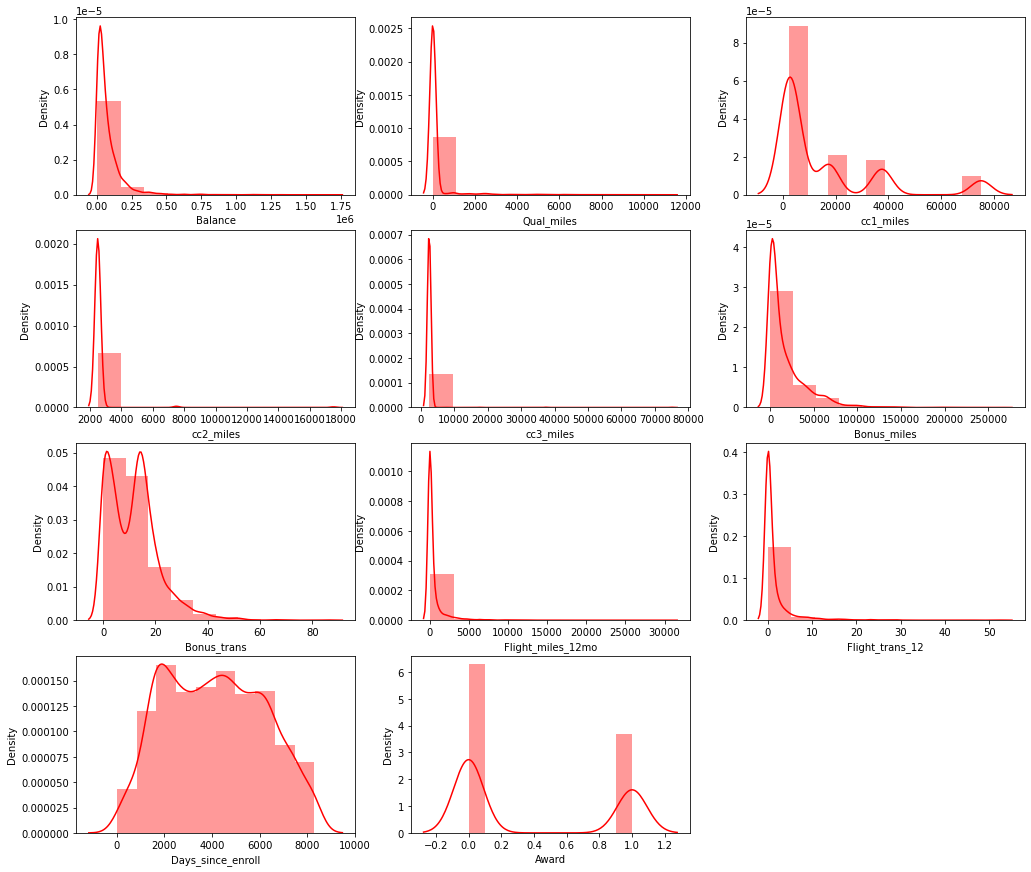

In [48]:
import seaborn as sns

plt.figure(figsize=(17,15)) 

plt.subplot(4,3,1)
sns.distplot(data['Balance'],bins=10,  kde = True, color =  'red' )      
plt.subplot(4,3,2)
sns.distplot(data['Qual_miles'],bins=10,  kde = True, color =  'red' )
plt.subplot(4,3,3)
sns.distplot(data['cc1_miles'],bins=10,  kde = True, color =  'red' )    
plt.subplot(4,3,4)
sns.distplot(data['cc2_miles'],bins=10,  kde = True, color =  'red' )      
plt.subplot(4,3,5)
sns.distplot(data['cc3_miles'],bins=10,  kde = True, color =  'red' )      
plt.subplot(4,3,6)
sns.distplot(data['Bonus_miles'],bins=10,  kde = True, color =  'red' )      
plt.subplot(4,3,7)
sns.distplot(data['Bonus_trans'],bins=10,  kde = True, color =  'red' )      
plt.subplot(4,3,8)
sns.distplot(data['Flight_miles_12mo'],bins=10,  kde = True, color =  'red' )      
plt.subplot(4,3,9)
sns.distplot(data['Flight_trans_12'],bins=10,  kde = True, color =  'red' )      
plt.subplot(4,3,10)
sns.distplot(data['Days_since_enroll'],bins=10,  kde = True, color =  'red' )      
plt.subplot(4,3,11)
sns.distplot(data['Award'],bins=10,  kde = True, color =  'red' )      


plt.show()

#for perfectly skewed N.D. kurtosis = 3

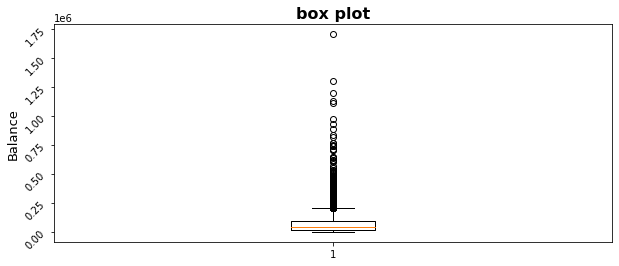

[array([18527.5,     0. ]), array([ 92404., 202636.])]

In [49]:
plt.figure(figsize=(10,4))                                                   #setting the frame using figure size
#figsize = plt.figaspect(9/6)                                                #setting the frame using aspect ratio
plt.title("box plot", fontsize = 16, fontweight = "bold")                    #title
plt.ylabel("Balance", fontsize = 13 )                                           #y-label
plt.yticks( rotation = 45, fontsize = 10)                                    #y-values rotation and font size


box=plt.boxplot(x='Balance', data=data)                                               
#box=plt.boxplot(x='Qual_miles', data=data)
#box=plt.boxplot(x='cc1_miles', data=data)
#box=plt.boxplot(x='cc2_miles', data=data)
#box=plt.boxplot(x='cc3_miles', data=data)
#box=plt.boxplot(x='Bonus_miles', data=data)
#box=plt.boxplot(x='Bonus_trans', data=data)
#box=plt.boxplot(x='Flight_miles_12mo', data=data)
#box=plt.boxplot(x='Flight_trans_12', data=data)
#box=plt.boxplot(x='Days_since_enroll', data=data)
#box=plt.boxplot(x='Award', data=data)

plt.show() 


[item.get_ydata() for item in box['whiskers']]



In [50]:
data.describe()

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,14970.617654,2591.272818,2661.915479,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,20499.272779,1005.448566,2937.629532,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,2500.000000,2500.000000,2500.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,2500.000000,2500.000000,2500.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,2500.000000,2500.000000,2500.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,17500.000000,2500.000000,2500.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,75000.000000,17500.000000,75000.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [51]:
#print(np.where(data['Balance']>202636))                         #near about 265 outliers
# print(np.where(data['Qual_miles']>0))                           #near about 220 outliers
# print(np.where(data['cc1_miles']>37500))                        #near about 280 outliers
# print(np.where(data['cc2_miles']>2500))                         #near about 50 outliers
# print(np.where(data['cc3_miles']>2500))                         #near about 20 outliers
# print(np.where(data['Bonus_miles']>57505))                      #near about 250 outliers
# print(np.where(data['Bonus_trans']>38))                         #near about 80 outliers
# print(np.where(data['Flight_miles_12mo']>767))                  #near about 550 outliers
#print(np.where(data['Flight_trans_12']>2))                       #near about 550 outliers


#we get large no of outliers bcoz in year large group of people travel very few; while some other people are frequent travellers
#for frequent travellers flight transactions are more , miles travelled are more etc ...


#don't delete the record becoz of outliers ;
#also we don't want to have outliers
#so we replace these with median or mode

In [52]:
# Computing 90th percentile and replacing the outliers with 90th percentile
p_90 = np.percentile(data['Balance'], 90)
data.loc[data.Balance > p_90, 'Balance'] = np.nan
data.fillna(p_90,inplace=True)
p_90 = np.percentile(data['Qual_miles'], 90)
data.loc[data.Qual_miles > p_90, 'Qual_miles'] = np.nan
data.fillna(p_90,inplace=True)
p_90 = np.percentile(data['cc1_miles'], 90)
data.loc[data.cc1_miles > p_90, 'cc1_miles'] = np.nan
data.fillna(p_90,inplace=True)
p_90 = np.percentile(data['cc2_miles'], 90)
data.loc[data.cc2_miles > p_90, 'cc2_miles'] = np.nan
data.fillna(p_90,inplace=True)
p_90 = np.percentile(data['cc3_miles'], 90)
data.loc[data.cc3_miles > p_90, 'cc3_miles'] = np.nan
data.fillna(p_90,inplace=True)
p_90 = np.percentile(data['Bonus_miles'], 90)
data.loc[data.Bonus_miles > p_90, 'Bonus_miles'] = np.nan
data.fillna(p_90,inplace=True)
p_90 = np.percentile(data['Bonus_trans'], 90)
data.loc[data.Bonus_trans > p_90, 'Bonus_trans'] = np.nan
data.fillna(p_90,inplace=True)
p_90 = np.percentile(data['Flight_miles_12mo'], 90)
data.loc[data.Flight_miles_12mo > p_90, 'Flight_miles_12mo'] = np.nan
data.fillna(p_90,inplace=True)
p_90 = np.percentile(data['Flight_trans_12'], 90)
data.loc[data.Flight_trans_12 > p_90, 'Flight_trans_12'] = np.nan
data.fillna(p_90,inplace=True)

In [53]:
#replacing the outliers with median

# data.loc[data.Balance > 202636, 'Balance'] = np.nan
# data.fillna(43097,inplace=True)
# data.loc[data.Qual_miles > 0, 'Qual_miles'] = np.nan
# data.fillna(0,inplace=True)
# data.loc[data.cc1_miles > 37500, 'cc1_miles'] = np.nan
# data.fillna(2500,inplace=True)
# data.loc[data.cc2_miles > 2500, 'cc2_miles'] = np.nan
# data.fillna(2500,inplace=True)
# data.loc[data.cc3_miles > 2500, 'cc3_miles'] = np.nan
# data.fillna(2500,inplace=True)
# data.loc[data.Bonus_miles > 57505, 'Bonus_miles'] = np.nan
# data.fillna(7171,inplace=True)
# data.loc[data.Bonus_trans > 38, 'Bonus_trans'] = np.nan
# data.fillna(12,inplace=True)
# data.loc[data.Flight_miles_12mo > 767, 'Flight_miles_12mo'] = np.nan
# data.fillna(0,inplace=True)
# data.loc[data.Flight_trans_12 > 2, 'Flight_trans_12'] = np.nan
# data.fillna(0,inplace=True)

In [54]:
data.describe()

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3999.000000,3999.0,3999.000000,3999.0,3999.0,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,60526.615154,0.0,12269.942486,2500.0,2500.0,14646.515629,10.754689,234.346087,0.770443,4118.55939,0.370343
std,1160.764358,51602.797668,0.0,13780.585584,0.0,0.0,16397.958541,7.641353,419.269051,1.340043,2065.13454,0.482957
min,1.000000,0.000000,0.0,2500.000000,2500.0,2500.0,0.000000,0.000000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,18527.500000,0.0,2500.000000,2500.0,2500.0,1250.000000,3.000000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,43097.000000,0.0,2500.000000,2500.0,2500.0,7171.000000,12.000000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,92404.000000,0.0,17500.000000,2500.0,2500.0,23800.500000,17.000000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,164186.800000,0.0,37500.000000,2500.0,2500.0,48529.600000,23.000000,1246.000000,4.000000,8296.00000,1.000000


### 2.3 scaling of data

In [55]:
#we should normalize or standardize our data ?

# https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/


In [56]:
# standardization of data 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(data.iloc[:,1:])
data_s=pd.DataFrame(x_scaled)
data_s.columns=['Balance','Qual_miles','cc1_miles','cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll','Award']
data_s = pd.concat([data['id'],data_s],axis=1)
data_s.head()

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,-0.627634,0.0,-0.709053,0.0,0.0,-0.882691,-1.276725,-0.559010,-0.575011,1.395454,-0.766919
1,2,-0.800107,0.0,-0.709053,0.0,0.0,-0.880190,-1.145842,-0.559010,-0.575011,1.379957,-0.766919
2,3,-0.371589,0.0,-0.709053,0.0,0.0,-0.641838,-0.884076,-0.559010,-0.575011,1.411920,-0.766919
3,4,-0.886703,0.0,-0.709053,0.0,0.0,-0.862808,-1.276725,-0.559010,-0.575011,1.372208,-0.766919
4,5,0.721473,0.0,1.831070,0.0,0.0,1.747600,1.602706,2.413201,2.410342,1.363975,1.303918


In [57]:
# Normalization of data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(data.iloc[:,1:])
data_n=pd.DataFrame(x_scaled)
data_n.columns=['Balance','Qual_miles','cc1_miles','cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll','Award']

data_n = pd.concat([data['id'],data_n],axis=1)
data_n.head()

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,0.171408,0.0,0.0,0.0,0.0,0.003585,0.043478,0.0,0.0,0.843742,0.0
1,2,0.117208,0.0,0.0,0.0,0.0,0.004430,0.086957,0.0,0.0,0.839884,0.0
2,3,0.251872,0.0,0.0,0.0,0.0,0.084958,0.173913,0.0,0.0,0.847842,0.0
3,4,0.089995,0.0,0.0,0.0,0.0,0.010303,0.043478,0.0,0.0,0.837955,0.0
4,5,0.595371,0.0,1.0,0.0,0.0,0.892239,1.000000,1.0,1.0,0.835905,1.0


In [58]:
## ORRRRRRR

# Normalization function 
# def norm_func(i):
#     x = (i-i.min())/(i.max()-i.min())
#     return (x)

# # Normalized data frame (considering the numerical part of data)
# df_norm = norm_func(data.iloc[:,1:])
# df_norm

# 2.4 PCA

#### a) for standardized data

In [59]:
data_s1 = data_s.iloc[:,1:11]
data_s_array = data_s1.values                  #converting dataframe into array

In [60]:
from sklearn.decomposition import PCA

model = PCA(n_components = 10)
pca_values = model.fit_transform(data_s_array)

var = model.explained_variance_ratio_                    # The amount of variance that each PCA explains is 

cum_var = np.cumsum(np.round(var,decimals = 4)*100)         # Cumulative variance 
cum_var

array([ 46.16,  70.71,  84.12,  92.44,  98.03,  99.08, 100.  , 100.  ,
       100.  , 100.  ])

In [61]:
data_s_p = pd.concat([data_s['id'],pd.DataFrame(pca_values[:,0:5],columns=['PCA1','PCA2','PCA3','PCA4','PCA5'])],axis=1)
data_s_p.head()

,id,PCA1,PCA2,PCA3,PCA4,PCA5
0,1,-1.608605,-0.135300,1.719081,0.405025,-0.413348
1,2,-1.619509,-0.146896,1.640511,0.583351,-0.319045
2,3,-1.215574,-0.259212,1.673303,0.299381,-0.139802
3,4,-1.704563,-0.133177,1.635621,0.629875,-0.440501
4,5,4.376327,1.529912,0.260070,1.097760,-0.439401


#### b) for normalised data

In [62]:
data_n1 = data_n.iloc[:,1:11]
data_n_array = data_n1.values                  #converting dataframe into array

In [63]:
from sklearn.decomposition import PCA

model = PCA(n_components = 10)
pca_values = model.fit_transform(data_n_array)

var = model.explained_variance_ratio_                    # The amount of variance that each PCA explains is 

cum_var = np.cumsum(np.round(var,decimals = 4)*100)         # Cumulative variance 
cum_var

array([ 49.75,  76.12,  85.28,  91.82,  97.82,  99.06, 100.01, 100.01,
       100.01, 100.01])

In [64]:
data_n_p = pd.concat([data_n['id'],pd.DataFrame(pca_values[:,0:3],columns=['PCA1','PCA2','PCA3'])],axis=1)
data_n_p.head()

,id,PCA1,PCA2,PCA3
0,1,-0.607961,-0.058311,0.280750
1,2,-0.607473,-0.062945,0.229942
2,3,-0.483255,-0.082682,0.303970
3,4,-0.632875,-0.062443,0.216676
4,5,1.459002,0.601733,-0.135367


### 3. creating dendrogram

#### a) for standardized data

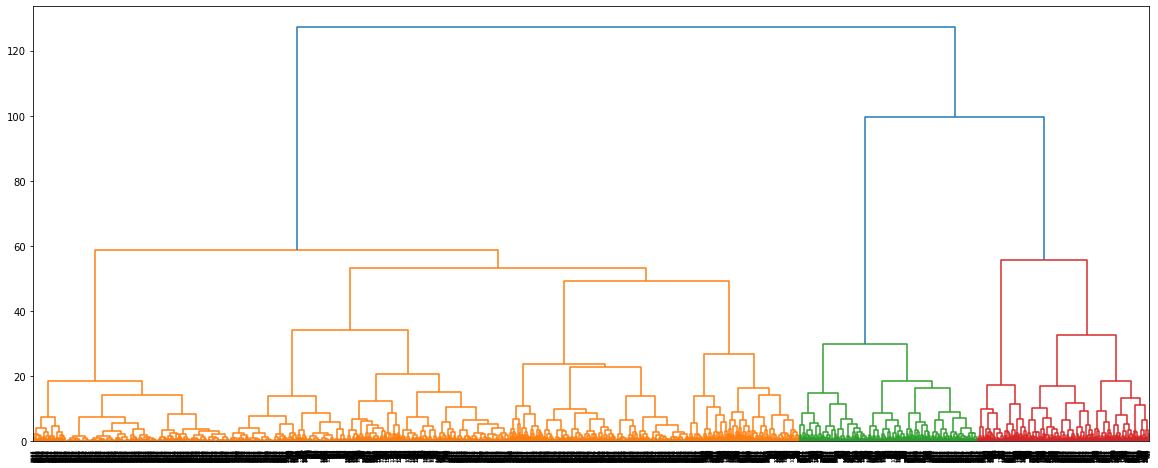

In [65]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20, 8)) 
dendrogram = sch.dendrogram(sch.linkage(data_s_p.iloc[:,1:], method='ward'))

In [81]:
#it is upto us to left with how many clusters
#mostly after 4 clusters, we don,t cut our dendrogram

#for y-axis = 48 (approx) , imagine a horizontal line ; we conclude that n_clusters = 6
#we can also make 5 clusters

#### b) for normalized data

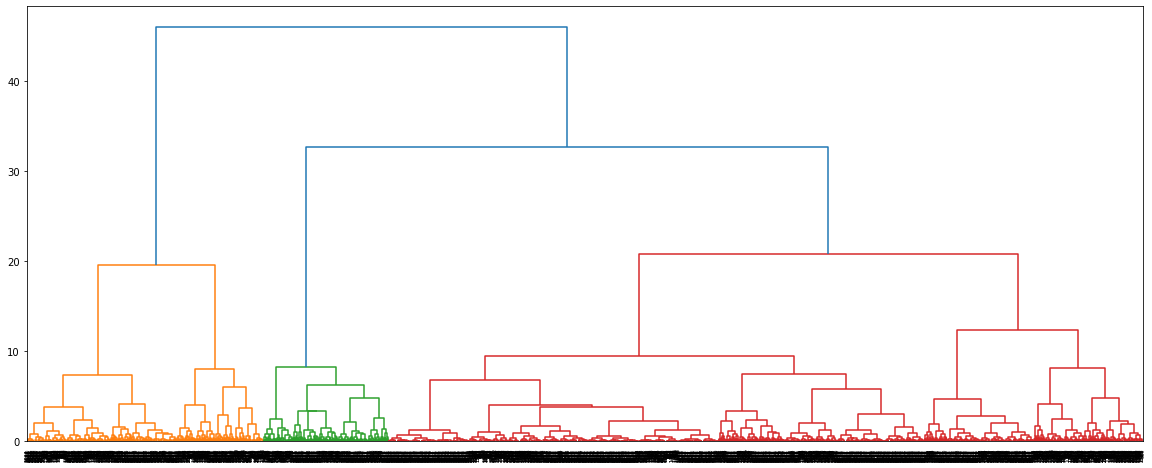

In [67]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20, 8)) 
dendrogram = sch.dendrogram(sch.linkage(data_n_p.iloc[:,1:], method='ward'))

In [69]:
#it is upto us to left with how many clusters
#mostly after 4 clusters, we don,t cut our dendrogram

#for y-axis = 15 (approx) , imagine a horizontal line ; we conclude that n_clusters = 5

### 4. creating clusters

In [82]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')
model

AgglomerativeClustering(n_clusters=5)

In [83]:
# save clusters for chart

y_pred = model.fit_predict(data_s_p)
#y_pred = model.fit_predict(data_n_p)
clusters=pd.DataFrame(y_pred,columns=['Clusters'])
clusters.head()

,Clusters
0,0
1,0
2,0
3,0
4,0


In [84]:
data['cluster_id'] = model.labels_
data.head()

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster_id
0,1,28143.0,0.0,2500.0,2500.0,2500.0,174.0,1.0,0.0,0.0,7000,0,0
1,2,19244.0,0.0,2500.0,2500.0,2500.0,215.0,2.0,0.0,0.0,6968,0,0
2,3,41354.0,0.0,2500.0,2500.0,2500.0,4123.0,4.0,0.0,0.0,7034,0,0
3,4,14776.0,0.0,2500.0,2500.0,2500.0,500.0,1.0,0.0,0.0,6952,0,0
4,5,97752.0,0.0,37500.0,2500.0,2500.0,43300.0,23.0,1246.0,4.0,6935,1,0


In [85]:
data_count = data.groupby('cluster_id').agg(['count']).reset_index()
data_count

,cluster_id,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,count,count,count,count,count,count,count,count,count,count,count,count
0,0,1079,1079,1079,1079,1079,1079,1079,1079,1079,1079,1079,1079
1,1,913,913,913,913,913,913,913,913,913,913,913,913
2,2,638,638,638,638,638,638,638,638,638,638,638,638
3,3,784,784,784,784,784,784,784,784,784,784,784,784
4,4,585,585,585,585,585,585,585,585,585,585,585,585


In [86]:
data.groupby('cluster_id').agg(['mean']).reset_index()

,cluster_id,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,546.004634,77999.357183,0.0,15887.395737,2500.0,2500.0,18824.925116,12.351251,279.010195,0.909175,6758.091752,0.463392
1,1,2778.679080,57243.284995,0.0,11448.521358,2500.0,2500.0,13707.299233,10.480832,196.386637,0.667032,2697.157722,0.362541
2,2,1411.368339,63238.070533,0.0,13550.156740,2500.0,2500.0,16349.189655,11.329154,262.020376,0.838558,5024.725705,0.429467
3,3,3629.471939,35886.820918,0.0,7066.326531,2500.0,2500.0,8757.948724,8.474490,193.636480,0.627551,1450.017857,0.204082
4,4,2026.035897,63487.780855,0.0,12457.264957,2500.0,2500.0,14440.244103,10.666667,235.584615,0.793162,4056.485470,0.369231


<AxesSubplot:xlabel='cluster_id'>

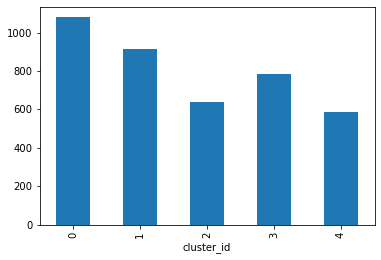

In [87]:
data.groupby('cluster_id').count()['id'].plot(kind='bar')